<a href="https://colab.research.google.com/github/Sreelakshmim6/Personal-Projects/blob/main/Travel_Insurance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

#read data
df=pd.read_csv("C:\\Users\\Siri\\Desktop\\CE802\\Assignment\\CE802_P3_Data\\CE802_P3_Data.csv")



In [ ]:
#to check the model accuracy -  484.7396481016478
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [ ]:
def cv(m,model):
    # Perform 10-fold cross validation
    scores = cross_val_score(m, x , y, cv=10)
    print ('Cross-validated scores:', scores)
    print("\n Average Cross-validated score:",np.average(scores),"\n")
    # Make cross validated predictions
    predictions = cross_val_predict(model, x, y, cv=10)
    #plt.scatter(y, predictions)

    accuracy = metrics.r2_score(y, predictions)
    print('CrossVal-Predicted Accuracy:', accuracy)

In [ ]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,193.83,UK,49.74,14.16,213.02,343.06,1753.44,-6.03,6.28,8,-5145.92,Low,11.35,1.01,1,68.92,51.16
1,1495.47,Europe,58.02,5.88,137.80,270.48,1665.33,-0.52,9.72,14,11145.82,High,10.30,0.30,5,89.30,0.00
2,1121.31,USA,68.85,9.18,209.54,295.26,3208.65,-4.00,3.86,6,31859.00,Medium,7.98,13.05,4,-11.80,2808.51
3,-305.49,USA,49.29,8.73,171.83,266.06,1704.18,-2.41,4.16,6,8075.76,Low,16.52,2.01,5,41.40,1092.21
4,1457.07,UK,64.98,7.92,74.10,260.22,1922.34,-11.97,5.00,18,9886.72,High,5.37,0.01,1,62.74,0.00


In [ ]:
df.shape

(1500, 17)

In [ ]:
print(df)

           F1      F2     F3     F4      F5      F6       F7     F8     F9  \
0      193.83      UK  49.74  14.16  213.02  343.06  1753.44  -6.03   6.28   
1     1495.47  Europe  58.02   5.88  137.80  270.48  1665.33  -0.52   9.72   
2     1121.31     USA  68.85   9.18  209.54  295.26  3208.65  -4.00   3.86   
3     -305.49     USA  49.29   8.73  171.83  266.06  1704.18  -2.41   4.16   
4     1457.07      UK  64.98   7.92   74.10  260.22  1922.34 -11.97   5.00   
...       ...     ...    ...    ...     ...     ...      ...    ...    ...   
1495   633.87  Europe  54.51   6.51  179.23  219.02  1064.04  -3.60   2.74   
1496   390.45    Rest  65.97   6.81  154.23  261.36   527.31  -6.83  23.50   
1497    78.72      UK  78.06   3.72  144.12  313.50   851.85  -3.59   2.26   
1498  2366.88    Rest  92.49  26.64  255.96  326.36  2191.02  -1.21   6.64   
1499   407.79    Rest  74.07  16.71  141.70  198.18  1400.88  -1.41  21.60   

      F10       F11     F12    F13    F14  F15     F16   Target

In [ ]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

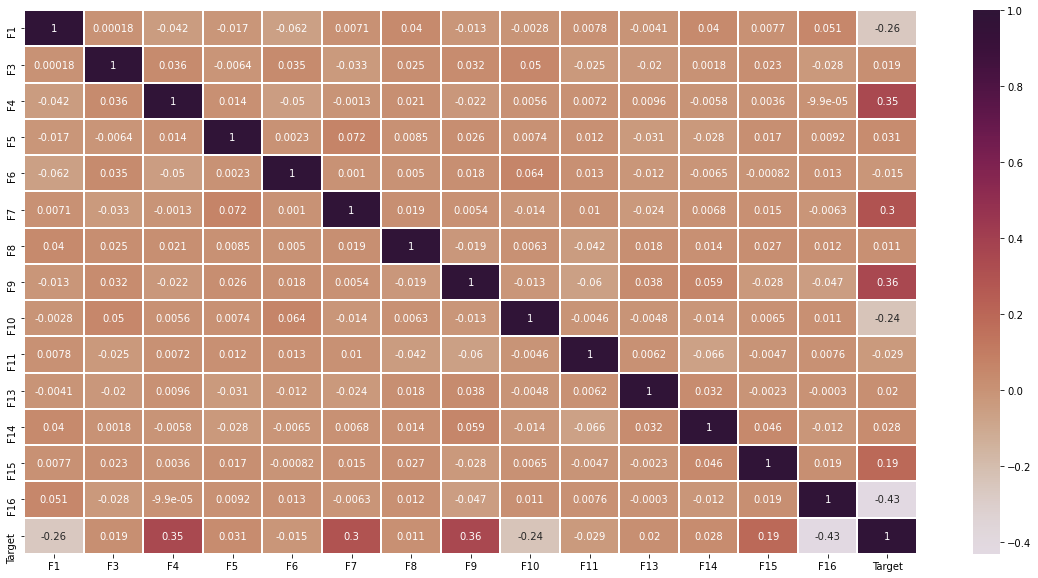

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="twilight_r",center=1,annot = True,linewidths=1)
# Correlation : F12<F11<F3<F6<F14<F7<F13<F4<F8<F9<F1<F2<F10<F5<F15


Categorical Variables to Numerical Variables - One hot encoding

In [ ]:
dummy1=pd.get_dummies(df['F2'])
dummy2=pd.get_dummies(df['F12'])


In [ ]:
master=pd.concat([df,dummy1,dummy2],axis=1)


Dropping Object cols-F2, F12 and cols with low correlation with Target variable-'Europe','Medium' and 'F8'

In [ ]:
#F1-0 (obj)F2-1 F3-2 F4-3 F5-4 F6-5 F7-6 F8-7 F9-8 F10-9 F11-10 (obj)F12-11 F13-12 F14-13 F15-14 F16-15
# Target- 16 Europe- 17 Rest-18 UK- 19
#'USA'- 20, 'High'- 21, 'Low'- 22, 'Medium'- 23, 'Very high'- 24, 'Very low'- 25

master=master.drop(['F2','F12','Europe','F8','Medium'],axis=1)
master

,F1,F3,F4,F5,F6,F7,F9,F10,F11,F13,...,F15,F16,Target,Rest,UK,USA,High,Low,Very high,Very low
0,193.83,49.74,14.16,213.02,343.06,1753.44,6.28,8,-5145.92,11.35,...,1,68.92,51.16,0,1,0,0,1,0,0
1,1495.47,58.02,5.88,137.80,270.48,1665.33,9.72,14,11145.82,10.30,...,5,89.30,0.00,0,0,0,1,0,0,0
2,1121.31,68.85,9.18,209.54,295.26,3208.65,3.86,6,31859.00,7.98,...,4,-11.80,2808.51,0,0,1,0,0,0,0
3,-305.49,49.29,8.73,171.83,266.06,1704.18,4.16,6,8075.76,16.52,...,5,41.40,1092.21,0,0,1,0,1,0,0
4,1457.07,64.98,7.92,74.10,260.22,1922.34,5.00,18,9886.72,5.37,...,1,62.74,0.00,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,633.87,54.51,6.51,179.23,219.02,1064.04,2.74,8,19120.54,10.29,...,4,29.66,0.00,0,0,0,0,1,0,0
1496,390.45,65.97,6.81,154.23,261.36,527.31,23.50,8,1359.86,11.58,...,6,-40.00,1241.64,1,0,0,0,1,0,0
1497,78.72,78.06,3.72,144.12,313.50,851.85,2.26,10,7519.18,15.07,...,4,44.80,0.00,0,1,0,0,1,0,0
1498,2366.88,92.49,26.64,255.96,326.36,2191.02,6.64,6,9741.86,11.40,...,3,29.96,396.84,1,0,0,0,1,0,0


In [ ]:
c=master.corr()
print(c['Target'])

F1          -0.263022
F3           0.018677
F4           0.346373
F5           0.031407
F6          -0.015412
F7           0.300890
F9           0.357137
F10         -0.236200
F11         -0.029194
F13          0.020443
F14          0.027713
F15          0.193704
F16         -0.430990
Target       1.000000
Rest        -0.238036
UK          -0.037504
USA          0.271030
High         0.115405
Low         -0.084860
Very high    0.154642
Very low    -0.165111
Name: Target, dtype: float64


In [ ]:
x=master.drop(['Target'],axis=1)
x

,F1,F3,F4,F5,F6,F7,F9,F10,F11,F13,F14,F15,F16,Rest,UK,USA,High,Low,Very high,Very low
0,193.83,49.74,14.16,213.02,343.06,1753.44,6.28,8,-5145.92,11.35,1.01,1,68.92,0,1,0,0,1,0,0
1,1495.47,58.02,5.88,137.80,270.48,1665.33,9.72,14,11145.82,10.30,0.30,5,89.30,0,0,0,1,0,0,0
2,1121.31,68.85,9.18,209.54,295.26,3208.65,3.86,6,31859.00,7.98,13.05,4,-11.80,0,0,1,0,0,0,0
3,-305.49,49.29,8.73,171.83,266.06,1704.18,4.16,6,8075.76,16.52,2.01,5,41.40,0,0,1,0,1,0,0
4,1457.07,64.98,7.92,74.10,260.22,1922.34,5.00,18,9886.72,5.37,0.01,1,62.74,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,633.87,54.51,6.51,179.23,219.02,1064.04,2.74,8,19120.54,10.29,1.22,4,29.66,0,0,0,0,1,0,0
1496,390.45,65.97,6.81,154.23,261.36,527.31,23.50,8,1359.86,11.58,1.01,6,-40.00,1,0,0,0,1,0,0
1497,78.72,78.06,3.72,144.12,313.50,851.85,2.26,10,7519.18,15.07,0.03,4,44.80,0,1,0,0,1,0,0
1498,2366.88,92.49,26.64,255.96,326.36,2191.02,6.64,6,9741.86,11.40,42.04,3,29.96,1,0,0,0,1,0,0


In [ ]:
y=master.drop(['F1', 'F3', 'F4', 'F5', 'F7','F6', 'F9', 'F10', 'F11', 'F13', 'F14','F15', 'F16','Rest', 'UK', 'USA', 'High', 'Low', 'Very high','Very low'],axis=1)
y

,Target
0,51.16
1,0.00
2,2808.51
3,1092.21
4,0.00
...,...
1495,0.00
1496,1241.64
1497,0.00
1498,396.84


Scaling the data to use in models which performs better with scaled data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# transform data
scaled_x = scaler_x.fit_transform(x)
sx=pd.DataFrame(scaled_x)
scaled_y = scaler_y.fit_transform(pd.DataFrame(y))


# Linear Regression

In [ ]:
#split the data into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_train.shape,y_train.shape)


(1050, 20) (1050, 1)


In [ ]:
#fit the model based on training data
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(x_train,y_train)


In [ ]:
y_pred=lm.predict(x_test)

Model Evaluation

In [ ]:
print("\nMSE:",mean_squared_error(y_test, y_pred)) #234972.52644170934

print("\nRMSE:",rmse(y_test, y_pred))#484.7396481016478


MSE: 234630.58577613274

RMSE: Target    484.386814
dtype: float64


In [ ]:
metrics.r2_score(y_test, y_pred) # previous r2_score-76, after dropping cols-'Europe','F8','Medium' it's now-84

0.7877018586180807

In [ ]:
#function for cross-validation scores
cv(lm,model)

Cross-validated scores: [0.77451946 0.77257919 0.79549841 0.77269271 0.76966629 0.78156494
 0.80484266 0.78761744 0.78222951 0.76233356]

 Average Cross-validated score: 0.7803544166562195 

CrossVal-Predicted Accuracy: 0.7814414151520405


# Decision Tree Regressor


In [ ]:
#split the data into training and test
x_train,x_test,y_train,y_test=train_test_split(sx,scaled_y,test_size=0.3)
print(x_train.shape,y_train.shape)


(1050, 20) (1050, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
model=dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [ ]:
y_pred=y_pred.reshape(450,1)

Model Evaluation

In [ ]:
print("\nMSE:",mean_squared_error(y_test, y_pred)) 

print("\nRMSE:",rmse(y_test, y_pred))


MSE: 0.05743674882928846

RMSE: 0.23965965206786155


In [ ]:
metrics.r2_score(y_test, y_pred) # prev-76, now-84

0.24183202488950262

In [ ]:

#function for cross-validation scores
cv(dtr,model)


Cross-validated scores: [0.23729553 0.29086302 0.26177527 0.21175535 0.43294471 0.36266263
 0.23643318 0.20674162 0.43382458 0.39283202]

 Average Cross-validated score: 0.30671279043899446 

CrossVal-Predicted Accuracy: 0.2987906262912373


In [ ]:
y_pred=y_pred.reshape(450,1)

In [ ]:
invscaled_y = scaler_y.inverse_transform(y_pred)
invscaled_yt = scaler_y.inverse_transform(y_test)
rmse(invscaled_yt,invscaled_y)


949.0546187852525

# XGBoost Regressor

In [ ]:
#split the data into training and test
x_train,x_test,y_train,y_test=train_test_split(sx,scaled_y,test_size=0.3)
print(x_train.shape,y_train.shape)


(1050, 20) (1050, 1)


In [ ]:
#import the model 
import xgboost as xgb


In [ ]:
#pip install xgboost

In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
parameters = {'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #`eta` value
              'max_depth': [5, 6, 7,8,9,10],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200,300,500]}

xgb_grid = GridSearchCV(xg_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    8.2s
[Parallel(n_jobs=5)]: Done 144 out of 144 | elapsed:   30.4s finished


[18:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.736371651174853
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 500, 'objective': 'reg:linear'}


In [ ]:
#parameter tuning
xg_reg = xgb.XGBRegressor(learning_rate = 0.03,max_depth = 5,n_estimators = 500)

In [ ]:
model=xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)

In [ ]:
y_pred=y_pred.reshape(450,1)

Model Evaluation

In [ ]:
print("\nMSE:",mean_squared_error(y_test, y_pred)) #

print("\nRMSE:",rmse(y_test, y_pred))#

print("\nr2_score is :",metrics.r2_score(y_test, y_pred) )#


MSE: 0.013170199333391738

RMSE: 0.11476148889497617

r2_score is : 0.8260445848577905


In [ ]:
cv(xg_reg,model)

Cross-validated scores: [0.83124768 0.81996114 0.82003829 0.83952685 0.86786761 0.79534643
 0.80153247 0.81177028 0.83479672 0.80595774]

 Average Cross-validated score: 0.8228045218631506 

CrossVal-Predicted Accuracy: 0.8237069595156978


In [ ]:
invscaled_y = scaler_y.inverse_transform(y_pred)
invscaled_yt = scaler_y.inverse_transform(y_test)
rmse(invscaled_yt,invscaled_y)


454.45664755594225

# KNN Regressor

In [ ]:
#split the data into training and test
x_train,x_test,y_train,y_test=train_test_split(sx,scaled_y,test_size=0.3)
print(x_train.shape,y_train.shape)


(1050, 20) (1050, 1)


In [ ]:
from sklearn import neighbors


In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error =rmse(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error) #17 is the least

RMSE value for k=  1 is: 0.23282049845932973
RMSE value for k=  2 is: 0.202498617748939
RMSE value for k=  3 is: 0.18893588541128564
RMSE value for k=  4 is: 0.18717694388541634
RMSE value for k=  5 is: 0.18243710494011176
RMSE value for k=  6 is: 0.18750572922666683
RMSE value for k=  7 is: 0.18733273413816948
RMSE value for k=  8 is: 0.19027360613340843
RMSE value for k=  9 is: 0.18847124074312419
RMSE value for k=  10 is: 0.19010754750062314
RMSE value for k=  11 is: 0.19396519244387328
RMSE value for k=  12 is: 0.1959868495464979
RMSE value for k=  13 is: 0.19825177861454088
RMSE value for k=  14 is: 0.19964614149148574
RMSE value for k=  15 is: 0.20299271897476956
RMSE value for k=  16 is: 0.20625647018384868
RMSE value for k=  17 is: 0.20749933632480283
RMSE value for k=  18 is: 0.2085683178988635
RMSE value for k=  19 is: 0.2095367640977576
RMSE value for k=  20 is: 0.2101512801963746
RMSE value for k=  21 is: 0.21226876465149366
RMSE value for k=  22 is: 0.2145548943926926
RMSE

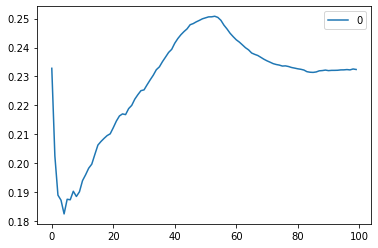

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':list(range(2, 200))}
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn,param_grid=params, cv=10)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 44}

In [ ]:
model

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Fitting the tuned model and evaluation of accuracy

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 44)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error =rmse(y_test,pred) #calculate rmse
print('RMSE value for k= 4 is:', error) 

RMSE value for k= 4 is: 0.18717694388541634


In [ ]:
invscaled_y = scaler_y.inverse_transform(pred)
invscaled_yt = scaler_y.inverse_transform(y_test)
rmse(invscaled_yt,invscaled_y)


741.2225695556876

# Random Forest 

In [ ]:
#split the data into training and test
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(sx,scaled_y,test_size=0.3)
print(x_train1.shape,y_train1.shape)


(1050, 20) (1050, 1)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Train the model on training data
rf.fit(x_train1,y_train1.ravel())
#predict values for testing set
y_pred1 = rf.predict(x_test1)

Model evaluation

In [ ]:

print("\nMSE:",mean_squared_error(y_test1, y_pred1)) #

print("\nRMSE:",rmse(y_test1, y_pred1))#

metrics.r2_score(y_test1, y_pred1) #


MSE: 0.023050546015228605

RMSE: 0.32515910718677726


0.6849693129687033

Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,125,150,200]
max_depth = [2,4,6,8,10,12,None]

param_grid = {'n_estimators':n_estimators, 'max_features':['auto'],'max_depth':max_depth, 'criterion':['mse','mae']}

# instantiate the grid
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=10)

# fit the grid with data
grid.fit(x_train1, y_train1.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#best model parameters
print(grid.best_params_)


{'criterion': 'mse', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 125}


Fitting the model with tuned parameters 

In [ ]:
rf = RandomForestRegressor(criterion='mse',max_depth= 12, max_features='auto', n_estimators= 125)
rf.fit(x_train1,y_train1.ravel())
y_pred1 = rf.predict(x_test1)

Tuned model accuracy

In [ ]:
#reshaping y_pred1 

y_pred1=y_pred1.reshape(-1,1)

In [ ]:
invscaled_y = scaler_y.inverse_transform(y_pred1)
invscaled_yt = scaler_y.inverse_transform(y_test1)

rmse(invscaled_y,invscaled_yt)

598.212357324211

# SVM

In [ ]:
#split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sx,scaled_y,test_size=0.3)
print(x_train.shape,y_train.shape)


(1050, 20) (1050, 1)


In [ ]:
from sklearn.svm import SVR
regressor = SVR()
model=regressor.fit(x_train,y_train.ravel())
y_pred = regressor.predict(x_test)

In [ ]:
#reshaping y_pred to the required shape
y_pred=y_pred.reshape(-1,1)

Model Evaluation


In [ ]:
print("\nMSE:",mean_squared_error(y_test, y_pred)) #

print("\nRMSE:",rmse(y_test, y_pred))#

metrics.r2_score(y_test, y_pred) #


MSE: 0.010936835354544943

RMSE: 0.10457932565543221


0.8616717888481777

In [ ]:
# Denormalizing the values using inverse_transform()
invscaled_y = scaler_y.inverse_transform(y_pred)
invscaled_yt = scaler_y.inverse_transform(y_test)

In [ ]:
rmse(invscaled_y,invscaled_yt)

414.1351753887681

Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000], 'epsilon':[0.01,0.02,0.03,0.04,0.005]}]

print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(), parameters, cv = K)
svr.fit(x_train, y_train.ravel())

# Checking the score for all parameters
print("Grid scores on training set:")
svr.best_params_

Tuning hyper-parameters
Grid scores on training set:


{'C': 10, 'epsilon': 0.04, 'gamma': 0.1, 'kernel': 'rbf'}

Fitting the model with tuned parameters 

In [ ]:
regressor = SVR(C= 10,epsilon=0.03,gamma=0.1,kernel= 'rbf')
regressor.fit(x_train,y_train.ravel())
y_pred = regressor.predict(x_test)

Tuned model accuracy

In [ ]:
#reshaping y_pred to the required shape
y_pred=y_pred.reshape(-1,1)

In [ ]:
invscaled_y = scaler_y.inverse_transform(y_pred)
invscaled_yt = scaler_y.inverse_transform(y_test)
rmse(invscaled_y,invscaled_yt)

382.37171985933514

# Predicting the test file using SVM

In [ ]:
Test=pd.read_csv("C:\\Users\\Siri\\Desktop\\CE802\\Assignment\\CE802_P3_Data\\CE802_P3_Test.csv")


In [ ]:
Test_original=Test.copy()

In [ ]:
Test_original

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,596.16,Rest,72.24,6.00,154.48,184.18,226.65,-8.21,18.46,10,6547.48,Very high,9.24,0.69,3,45.06,NaN
1,1851.57,Europe,63.09,10.47,200.93,183.48,1101.51,-7.91,3.76,4,-983.62,Medium,8.20,17.90,5,88.64,NaN
2,-945.60,USA,71.22,8.25,190.35,243.96,924.93,-6.35,2.48,6,-2366.10,Very high,11.10,329.72,2,-41.36,NaN
3,1153.38,Europe,62.52,7.41,165.21,245.64,1017.09,-5.84,6.58,14,-503.06,High,7.53,0.00,2,-91.60,NaN
4,-261.63,UK,60.87,10.14,201.96,216.28,1350.96,-2.75,4.02,6,19521.62,High,8.99,360.26,4,154.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1841.31,UK,59.22,19.53,166.61,210.24,1090.50,-5.94,11.46,12,4755.62,Very low,13.37,234.82,5,4.60,NaN
1496,746.73,UK,55.53,4.05,162.15,206.50,1159.14,-3.38,21.24,6,10932.52,Low,14.21,17.04,3,157.08,NaN
1497,1059.75,Rest,62.85,7.08,161.39,309.70,476.43,-2.17,11.80,6,13297.52,High,13.17,149.51,2,-76.30,NaN
1498,279.90,Europe,76.68,2.01,194.31,186.62,1491.96,-6.27,16.00,10,685.12,High,10.17,4.69,3,-69.40,NaN


In [ ]:
Test.isnull().sum()

F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
Target    1500
dtype: int64

In [ ]:
dummy1=pd.get_dummies(Test['F2'])
dummy2=pd.get_dummies(Test['F12'])
Tmaster=pd.concat([Test,dummy1,dummy2],axis=1)
Tmaster=Tmaster.drop(['F2','F12','Europe','F8','Medium'],axis=1)

x=Tmaster.drop(['Target'],axis=1)
#y=Tmaster.drop(['F1', 'F3', 'F4', 'F5', 'F7','F6', 'F9', 'F10', 'F11', 'F13', 'F14','F15', 'F16','Rest', 'UK', 'USA', 'High', 'Low', 'Very high','Very low'],axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()

# transform data
scaled_x = scaler_x.fit_transform(x)
sx=pd.DataFrame(scaled_x)
#scaled_y = scaler_y.fit_transform(pd.DataFrame(y))


In [ ]:
sx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.442503,0.604512,0.109131,0.451459,0.340717,0.321907,0.521689,0.5,0.533826,0.410270,0.000019,0.272727,0.566814,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.634943,0.541391,0.192094,0.567832,0.338821,0.465492,0.102169,0.2,0.449790,0.354054,0.000494,0.454545,0.670621,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.206168,0.597475,0.150891,0.541325,0.502600,0.436511,0.065639,0.3,0.434363,0.510811,0.009100,0.181818,0.360964,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.527919,0.537459,0.135301,0.478341,0.507149,0.451637,0.182648,0.7,0.455152,0.317838,0.000000,0.181818,0.241294,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.311013,0.526076,0.185969,0.570412,0.427643,0.506433,0.109589,0.3,0.678600,0.396757,0.009943,0.363636,0.827069,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.633371,0.514694,0.360245,0.481849,0.411287,0.463685,0.321918,0.6,0.513832,0.633514,0.006481,0.454545,0.470440,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1496,0.465584,0.489238,0.072940,0.470675,0.401159,0.474951,0.601027,0.3,0.582757,0.678919,0.000470,0.272727,0.833643,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1497,0.513566,0.539735,0.129176,0.468771,0.680622,0.362902,0.331621,0.3,0.609147,0.622703,0.004126,0.181818,0.277738,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1498,0.394024,0.635141,0.035078,0.551246,0.347325,0.529574,0.451484,0.5,0.468411,0.460541,0.000129,0.272727,0.294174,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#predicting test data using SVM regressor 
y_pred_Test = regressor.predict(sx)
y_pred_Test=y_pred_Test.reshape(-1,1)
invscaled_Test = scaler_y.inverse_transform(y_pred_Test)


In [ ]:
print(invscaled_Test)

[[ 811.86567374]
 [ 466.72237468]
 [2357.6523504 ]
 ...
 [ 817.8208376 ]
 [2818.05002005]
 [ 561.15700871]]


In [ ]:
#storing the predictions made in the original test file
Test_original.loc[:,'Target']=invscaled_Test

In [ ]:
Test_original.head(500)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,596.16,Rest,72.24,6.00,154.48,184.18,226.65,-8.21,18.46,10,6547.48,Very high,9.24,0.69,3,45.06,811.865674
1,1851.57,Europe,63.09,10.47,200.93,183.48,1101.51,-7.91,3.76,4,-983.62,Medium,8.20,17.90,5,88.64,466.722375
2,-945.60,USA,71.22,8.25,190.35,243.96,924.93,-6.35,2.48,6,-2366.10,Very high,11.10,329.72,2,-41.36,2357.652350
3,1153.38,Europe,62.52,7.41,165.21,245.64,1017.09,-5.84,6.58,14,-503.06,High,7.53,0.00,2,-91.60,1399.040246
4,-261.63,UK,60.87,10.14,201.96,216.28,1350.96,-2.75,4.02,6,19521.62,High,8.99,360.26,4,154.32,268.865470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1167.30,UK,53.88,12.81,135.72,276.52,-306.24,-10.93,6.72,10,-1034.40,Very high,10.53,0.77,3,-3.26,533.623399
496,646.35,Rest,72.81,11.49,116.72,217.56,-19.38,-0.48,14.16,8,9722.56,Low,14.62,38.34,4,0.18,628.195536
497,-249.69,UK,47.37,4.05,189.41,279.60,-233.52,-6.67,16.78,6,7117.72,Low,14.77,0.01,4,65.90,974.600221
498,587.67,USA,29.43,8.13,190.48,270.20,-453.60,-7.11,12.00,8,10454.74,Medium,11.19,9.84,4,108.82,273.293630


In [ ]:
Test_original.to_csv("C:\\Users\\Siri\\Desktop\\CE802\\Assignment\\CE802_P3_Data\\CE802_P3_Test.csv")